# Times Series Model

## Nation-level

In [72]:
import pandas as pd

col_list = ['Date', 'New Cases']

uscase = pd.read_csv('daily_case.csv', usecols = col_list)
uscase["Date"] = pd.to_datetime(uscase.Date)

employ = pd.read_csv('US_level_employment.csv')
employ["Date"] = pd.to_datetime(employ.Date)
employ['Employment'] = employ['Employment'].replace("," "")

def dele(text):
    return text.replace(",", "")

employ["Employment"] = employ["Employment"].apply(dele)
employ.head()

employ["Employment"] = employ["Employment"].astype(int)

test = pd.merge(uscase, employ)
test = test.sort_values(by=["Date"])

In [73]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

data = test[["New Cases", "Employment"]]
data.index = test["Date"]
data.head()

from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(data, maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7697  , p=0.3913  , df_denom=19, df_num=1
ssr based chi2 test:   chi2=0.8912  , p=0.3451  , df=1
likelihood ratio test: chi2=0.8737  , p=0.3499  , df=1
parameter F test:         F=0.7697  , p=0.3913  , df_denom=19, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0397  , p=0.3763  , df_denom=16, df_num=2
ssr based chi2 test:   chi2=2.7293  , p=0.2555  , df=2
likelihood ratio test: chi2=2.5659  , p=0.2772  , df=2
parameter F test:         F=1.0397  , p=0.3763  , df_denom=16, df_num=2


{1: ({'ssr_ftest': (0.7697044593694703, 0.391267241725583, 19.0, 1),
   'ssr_chi2test': (0.8912367424278077, 0.34514238239421413, 1),
   'lrtest': (0.8736575971191769, 0.34994471735842747, 1),
   'params_ftest': (0.7697044593694699, 0.391267241725583, 19.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.0397228037754531, 0.376252148875045, 16.0, 2),
   'ssr_chi2test': (2.729272359910564, 0.2554736055008205, 2),
   'lrtest': (2.5659263480538357, 0.27721464698061393, 2),
   'params_ftest': (1.0397228037754733, 0.37625214887503783, 16.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [67]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue': round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']

    def adjust(val, length= 6): 
        return str(val).ljust(length)
  
    print(f'Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f'Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f'Significance Level = {signif}')
    print(f'Test Statistic = {output["test_statistic"]}')
    print(f'No. Lags Chosen = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')
        if p_value <= 0.05:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")
            
for name, column in data.iteritems():
    adfuller_test(column, column.name)

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = New Cases
Test Statistic = -3.1296
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.0244. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.0244. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 10%    = -2.702
 => P-Value = 0.0244. Rejecting Null Hypothesis.
 => Series is Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = Employment
Test Statistic = 2.1608
No. Lags Chosen = 8
 Critical value 1%     = -4.012
 => P-Value = 0.9988. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.104
 => P-Value = 0.9988. Weak evidence to reject the Null Hypothesis.
 => Series is Non

In [68]:
data = np.log(data).diff().dropna()
for name, column in data.iteritems():
    adfuller_test(column, column.name)

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = New Cases
Test Statistic = -3.3599
No. Lags Chosen = 9
 Critical value 1%     = -4.138
 => P-Value = 0.0124. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 5%     = -3.155
 => P-Value = 0.0124. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 10%    = -2.714
 => P-Value = 0.0124. Rejecting Null Hypothesis.
 => Series is Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = Employment
Test Statistic = -3.5161
No. Lags Chosen = 6
 Critical value 1%     = -3.964
 => P-Value = 0.0076. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 5%     = -3.085
 => P-Value = 0.0076. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 10%    = -2.68

In [74]:
model = VAR(data)
model.select_order(maxlags=6).summary()

/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,52.35,52.45,5.429e+22,52.36
1,49.82,50.11,4.342e+21,49.84
2,50.03,50.52,5.544e+21,50.08
3,50.49,51.18,9.394e+21,50.56
4,50.57,51.45,1.164e+22,50.66
5,50.41,51.48,1.274e+22,50.51
6,47.46*,48.74*,1.084e+21*,47.59*


In [75]:
results = model.fit(1)
print(results.coefs[0][1][0])
results.summary()

16.825824579231924


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, Jul, 2022
Time:                     03:38:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    52.7807
Nobs:                     22.0000    HQIC:                   52.5532
Log likelihood:          -633.748    FPE:                6.23181e+22
AIC:                      52.4831    Det(Omega_mle):     4.82591e+22
--------------------------------------------------------------------
Results for equation New Cases
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const           -220673.983051    290014.905694           -0.761           0.447
L1.New Cases          0.608219         0.172758            3.521           0.000
L1.Employment         0.001812         0.002065         

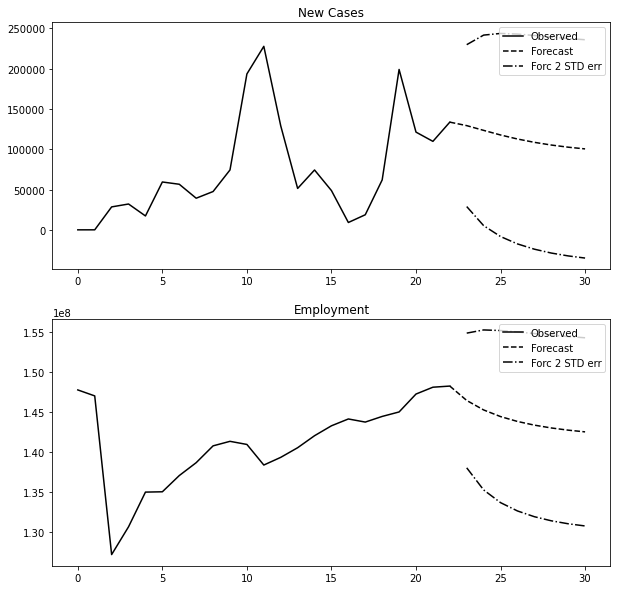

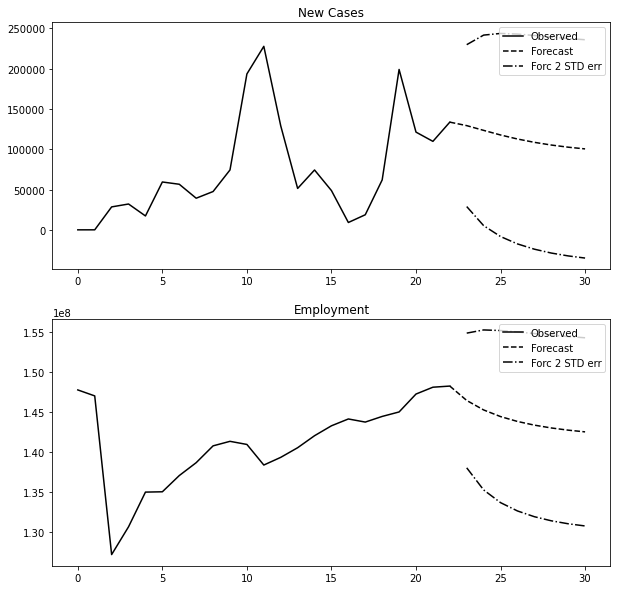

In [76]:
model.select_order(6)
results = model.fit(maxlags=1, ic='aic')
lag_order = results.k_ar
results.forecast(data.values[-lag_order:], 2)
results.plot_forecast(8)

## MSA-level

In [63]:
cases = pd.read_csv("cases_cleaned.csv")
emp = pd.read_csv("employment_cleaned.csv")

code_lst = cases.columns
code_lst = code_lst.drop("Date")

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = -0.7922
No. Lags Chosen = 1
 Critical value 1%     = -3.788
 => P-Value = 0.8214. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.013
 => P-Value = 0.8214. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.646
 => P-Value = 0.8214. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 1.5509
No. Lags Chosen = 8
 Critical value 1%     = -4.012
 => P-Value = 0.9977. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.104
 => P-Value = 0.9977. 

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = -4.0329
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.0012. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.0012. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 10%    = -2.702
 => P-Value = 0.0012. Rejecting Null Hypothesis.
 => Series is Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 2.7358
No. Lags Chosen = 8
 Critical value 1%     = -4.012
 => P-Value = 0.9991. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.104
 => P-Value = 0.9991. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Sta

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = 0.011
No. Lags Chosen = 2
 Critical value 1%     = -3.809
 => P-Value = 0.9594. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.022
 => P-Value = 0.9594. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.651
 => P-Value = 0.9594. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 2.4414
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.999. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.999. Weak

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = -0.997
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.7544. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.7544. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.702
 => P-Value = 0.7544. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 2.966
No. Lags Chosen = 8
 Critical value 1%     = -4.012
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.104
 => P-Value = 1.0. Weak evi

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = 0.064
No. Lags Chosen = 6
 Critical value 1%     = -3.924
 => P-Value = 0.9635. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.068
 => P-Value = 0.9635. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.674
 => P-Value = 0.9635. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 0.8591
No. Lags Chosen = 8
 Critical value 1%     = -4.012
 => P-Value = 0.9925. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.104
 => P-Value = 0.9925. We

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = 0.2801
No. Lags Chosen = 2
 Critical value 1%     = -3.809
 => P-Value = 0.9764. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.022
 => P-Value = 0.9764. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.651
 => P-Value = 0.9764. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 3.3751
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 1.0. Weak ev

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = 0.0267
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.9607. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.9607. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.702
 => P-Value = 0.9607. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 1.0571
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.9948. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.9948. W

/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus


Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = 2.1355
No. Lags Chosen = 5
 Critical value 1%     = -3.889
 => P-Value = 0.9988. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.054
 => P-Value = 0.9988. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.667
 => P-Value = 0.9988. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 2.2931
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.999. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.999. We

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = -0.1341
No. Lags Chosen = 6
 Critical value 1%     = -3.924
 => P-Value = 0.9459. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.068
 => P-Value = 0.9459. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.674
 => P-Value = 0.9459. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 3.6291
No. Lags Chosen = 8
 Critical value 1%     = -4.012
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.104
 => P-Value = 1.0. Weak e

/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/vector_ar/plotting.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 10))
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = 0.8168
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.9919. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.9919. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.702
 => P-Value = 0.9919. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 1.311
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.9967. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.9967. We

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, Jul, 2022
Time:                     03:36:26
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    38.8788
Nobs:                     22.0000    HQIC:                   38.6514
Log likelihood:          -480.827    FPE:                5.71626e+16
AIC:                      38.5813    Det(Omega_mle):     4.42667e+16
--------------------------------------------------------------------
Results for equation cases
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const            -21898.707314     79889.989094           -0.274           0.784
L1.cases              1.026075         0.029131           35.223           0.000
L1.employment         0.030205         0.080458            0

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = 0.8811
No. Lags Chosen = 7
 Critical value 1%     = -3.964
 => P-Value = 0.9928. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.085
 => P-Value = 0.9928. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.682
 => P-Value = 0.9928. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = -2.0508
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.2647. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.2647. 

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ[code] = employ[code].astype(int)
/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = -0.1623
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.9429. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.9429. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.702
 => P-Value = 0.9429. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = -2.1253
No. Lags Chosen = 0
 Critical value 1%     = -3.77
 => P-Value = 0.2345. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.005
 => P-Value = 0.2345. 

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = -3.9456
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.0017. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.0017. Rejecting Null Hypothesis.
 => Series is Stationary.
 Critical value 10%    = -2.702
 => P-Value = 0.0017. Rejecting Null Hypothesis.
 => Series is Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = -1.6791
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.4419. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.4419. Weak evidence to reject the Null Hypothesis.
 => Series is Non-St

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = 0.3376
No. Lags Chosen = 2
 Critical value 1%     = -3.809
 => P-Value = 0.979. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.022
 => P-Value = 0.979. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.651
 => P-Value = 0.979. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = -0.2307
No. Lags Chosen = 8
 Critical value 1%     = -4.012
 => P-Value = 0.9348. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.104
 => P-Value = 0.9348. Wea

/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = -0.1573
No. Lags Chosen = 5
 Critical value 1%     = -3.889
 => P-Value = 0.9434. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.054
 => P-Value = 0.9434. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.667
 => P-Value = 0.9434. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 4.7797
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 1.0. Weak e

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = 0.8488
No. Lags Chosen = 8
 Critical value 1%     = -4.012
 => P-Value = 0.9924. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.104
 => P-Value = 0.9924. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.691
 => P-Value = 0.9924. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = -1.3759
No. Lags Chosen = 5
 Critical value 1%     = -3.889
 => P-Value = 0.5938. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.054
 => P-Value = 0.5938. 

/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = 1.0061
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.9943. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.9943. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.702
 => P-Value = 0.9943. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = -1.2599
No. Lags Chosen = 5
 Critical value 1%     = -3.889
 => P-Value = 0.6473. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.054
 => P-Value = 0.6473. 

/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = 0.4507
No. Lags Chosen = 2
 Critical value 1%     = -3.809
 => P-Value = 0.9833. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.022
 => P-Value = 0.9833. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.651
 => P-Value = 0.9833. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 0.9675
No. Lags Chosen = 8
 Critical value 1%     = -4.012
 => P-Value = 0.9939. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.104
 => P-Value = 0.9939. W

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = 0.0753
No. Lags Chosen = 5
 Critical value 1%     = -3.889
 => P-Value = 0.9643. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.054
 => P-Value = 0.9643. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.667
 => P-Value = 0.9643. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 2.026
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 0.9987. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 0.9987. We

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ[code] = employ[code].astype(int)
/Users/yujiachen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = cases
Test Statistic = 0.0797
No. Lags Chosen = 2
 Critical value 1%     = -3.809
 => P-Value = 0.9646. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.022
 => P-Value = 0.9646. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 10%    = -2.651
 => P-Value = 0.9646. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = employment
Test Statistic = 3.8788
No. Lags Chosen = 9
 Critical value 1%     = -4.069
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
 Critical value 5%     = -3.127
 => P-Value = 1.0. Weak ev

/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid["Date"] = pd.to_datetime(covid["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ["Date"] = pd.to_datetime(employ["Date"])
/var/folders/4j/b30m2c8d7wlf01y0qw75gxd40000gn/T/ipykernel_70923/569405683.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

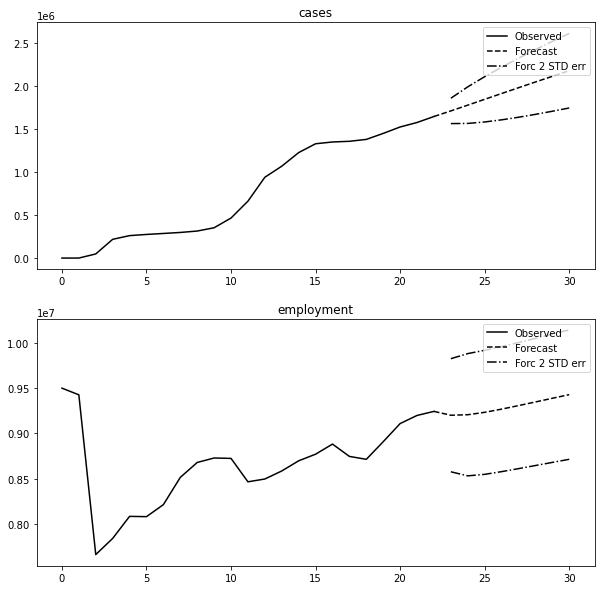

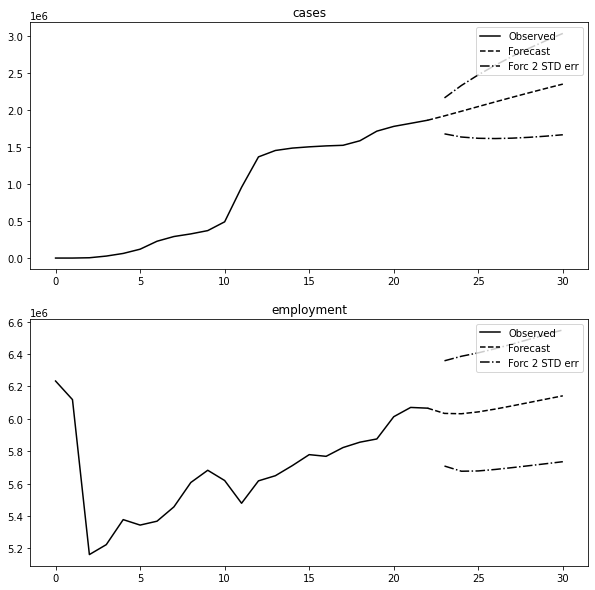

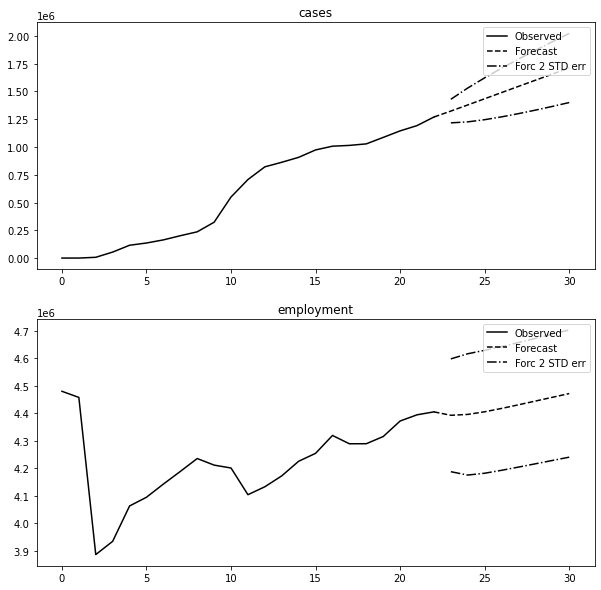

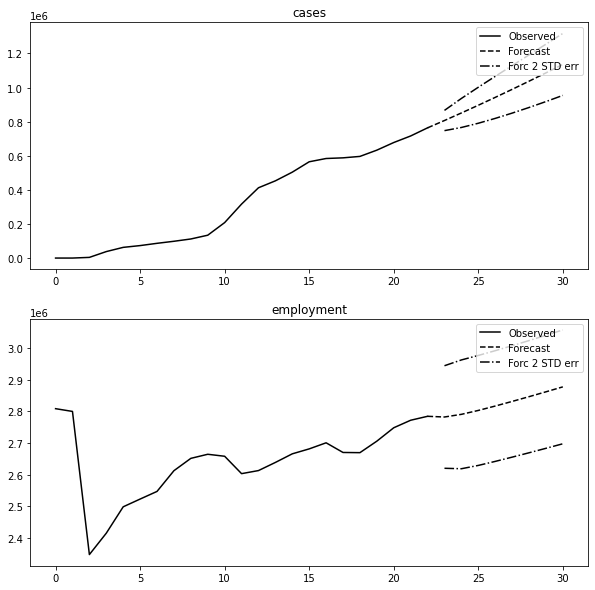

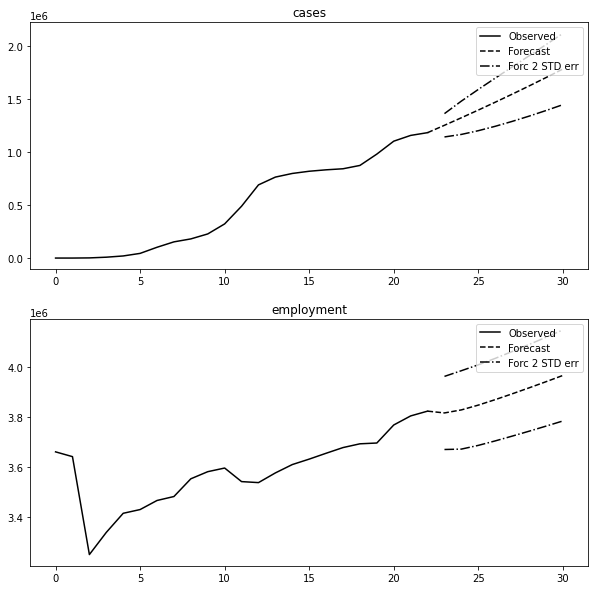

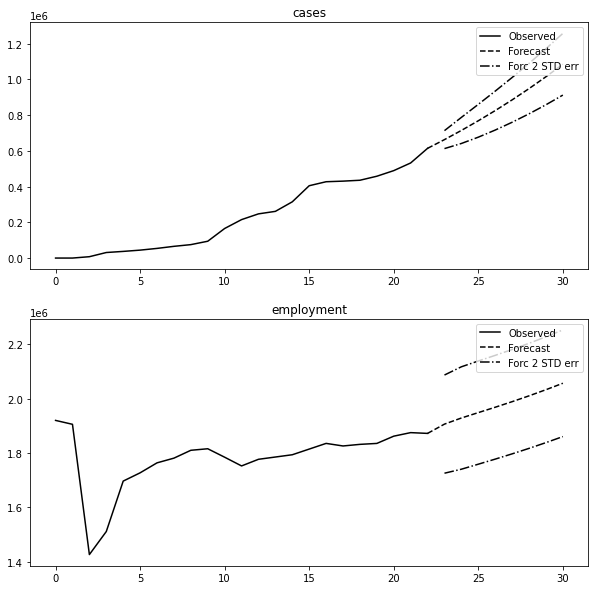

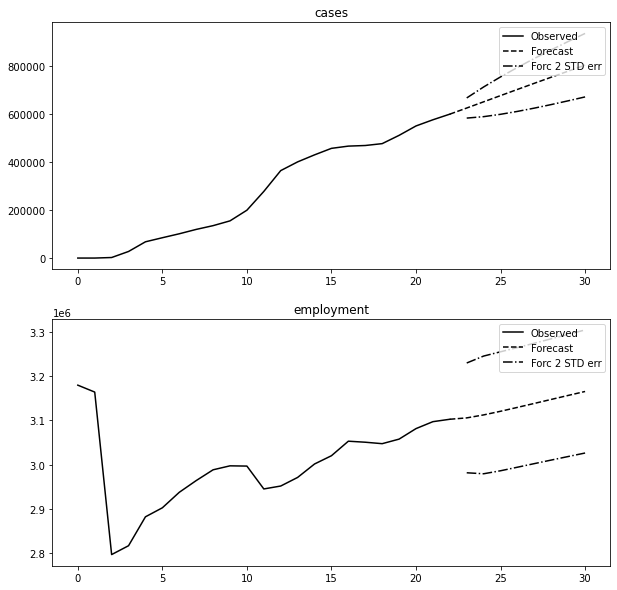

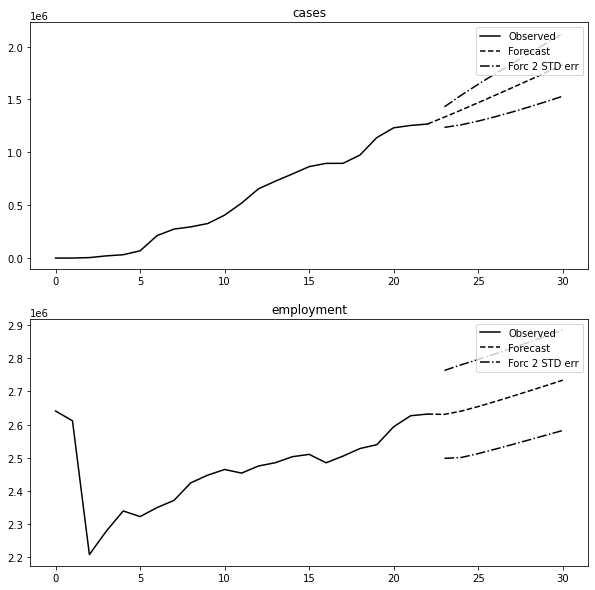

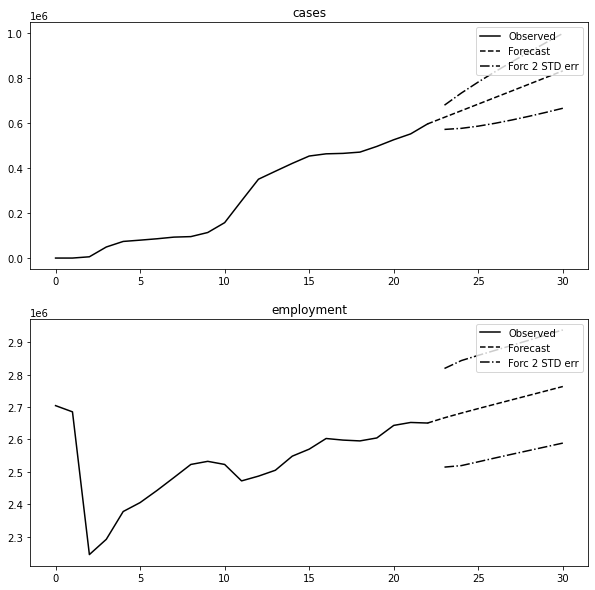

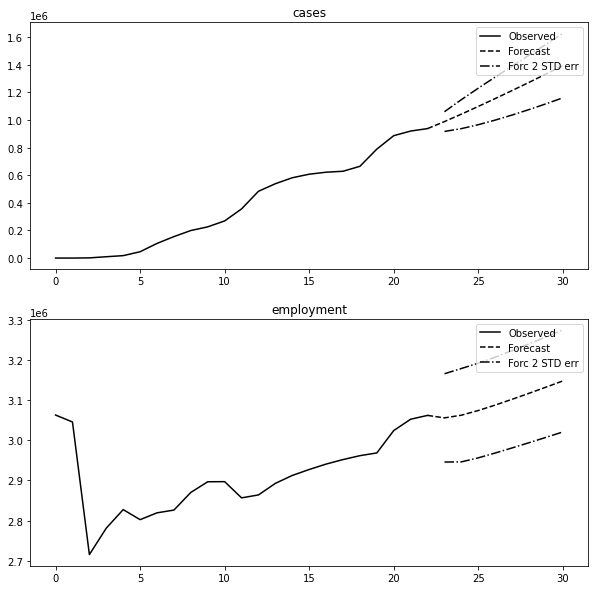

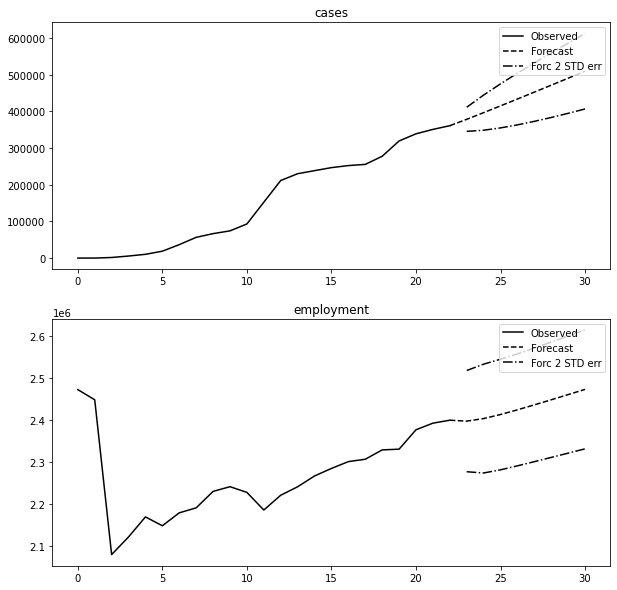

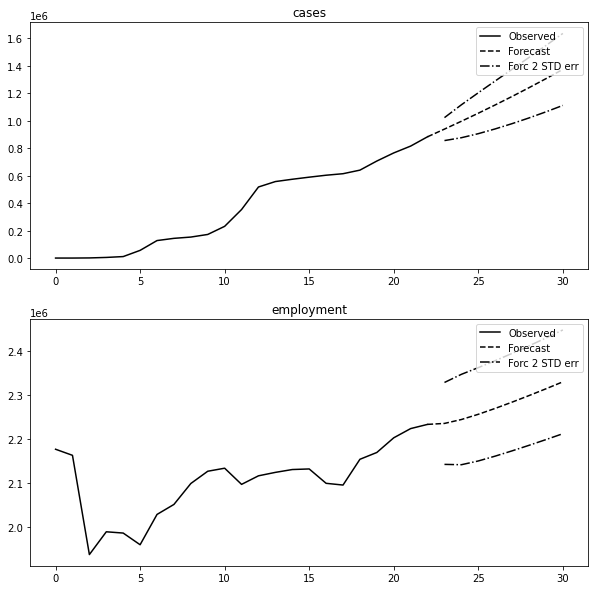

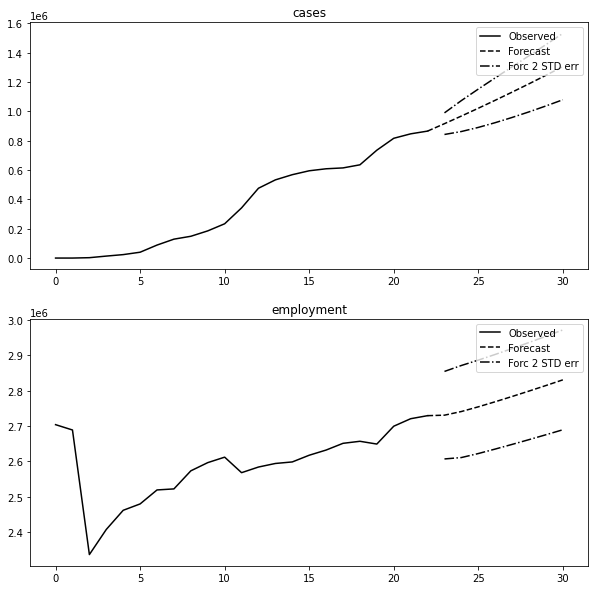

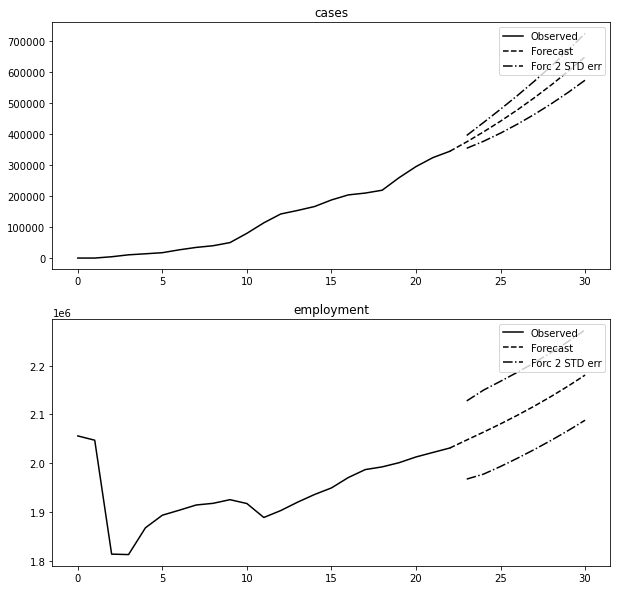

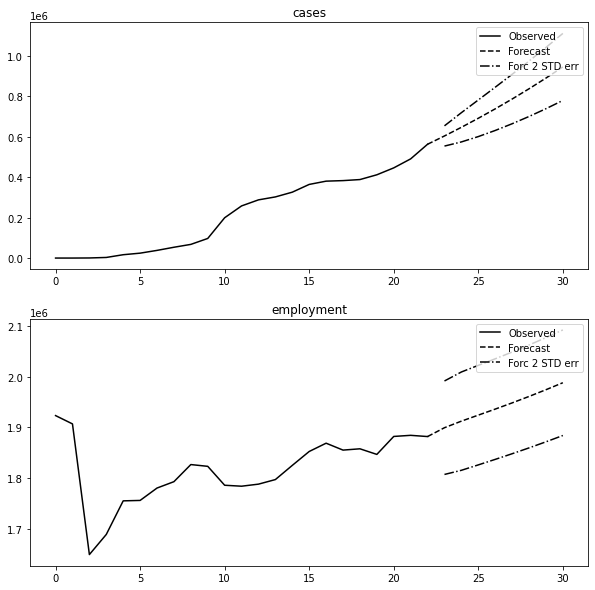

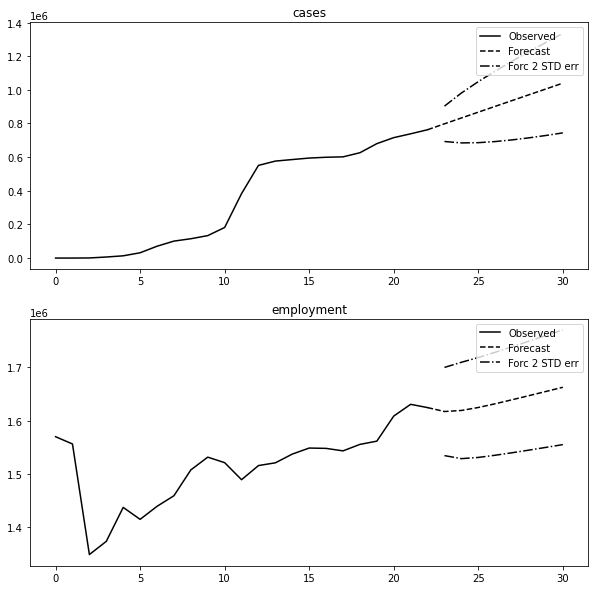

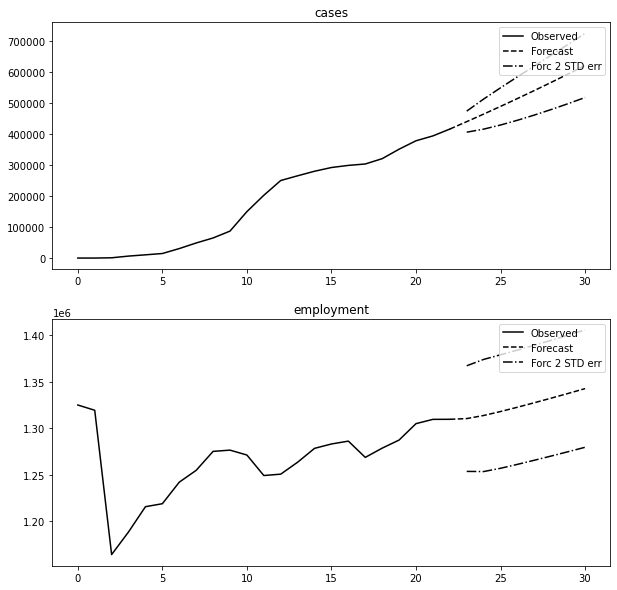

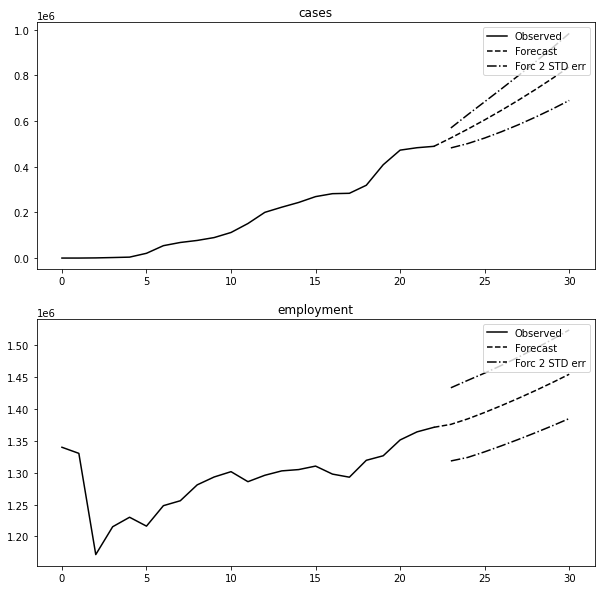

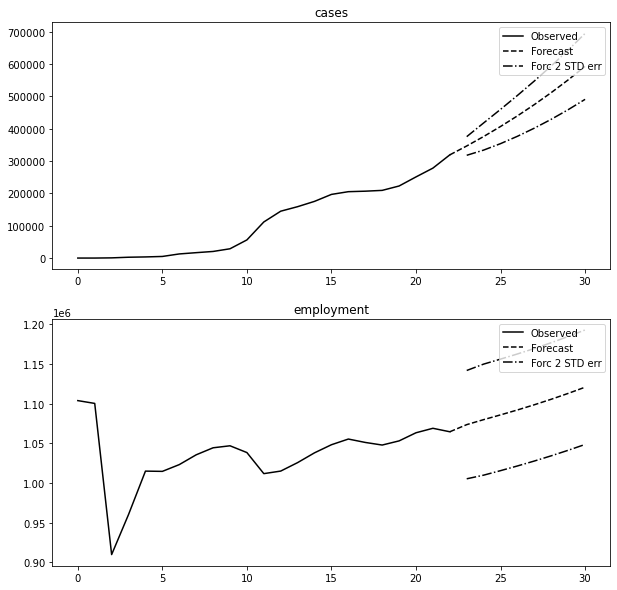

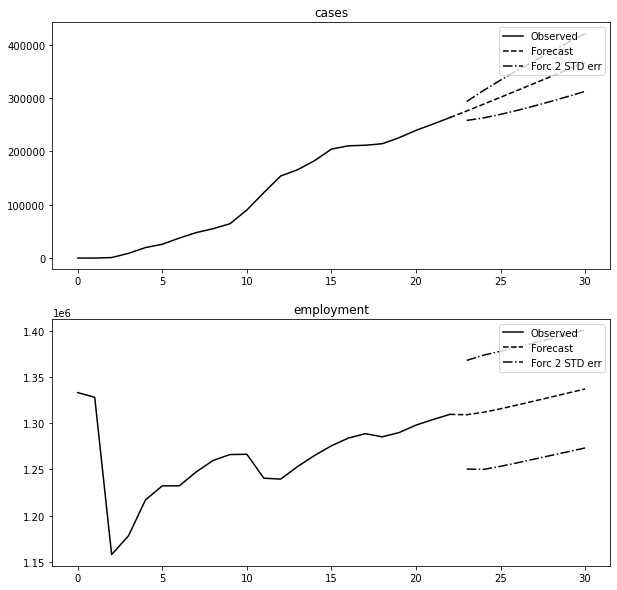

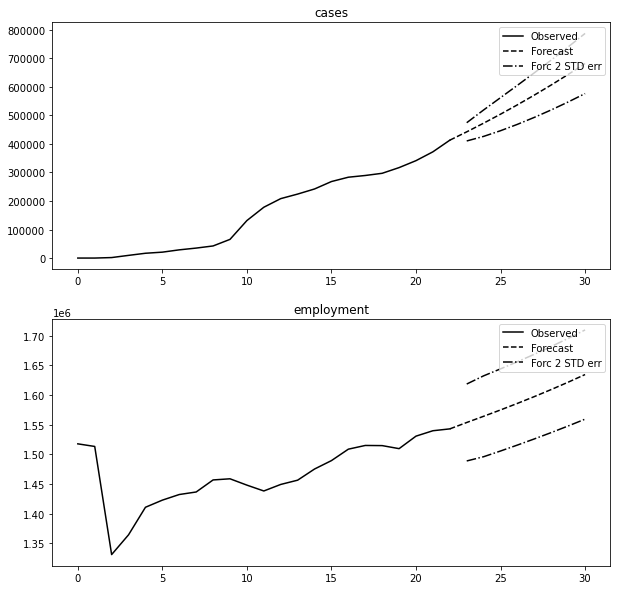

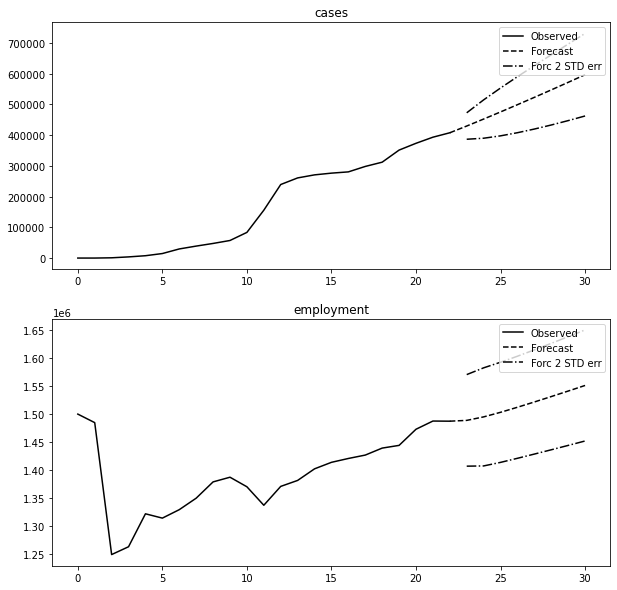

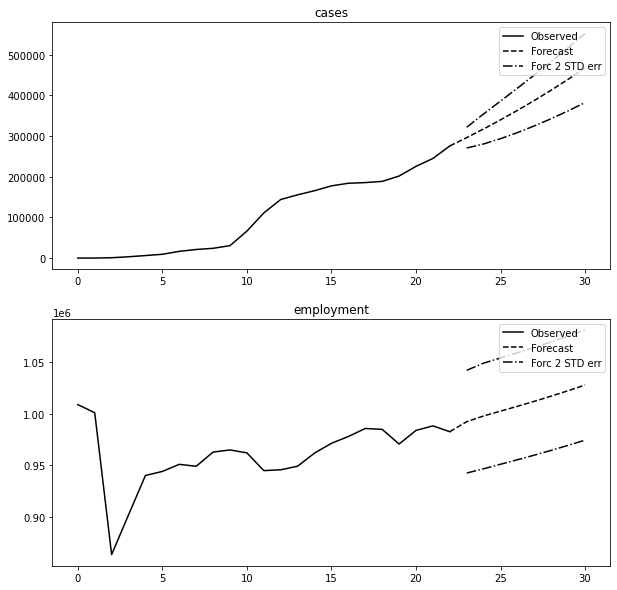

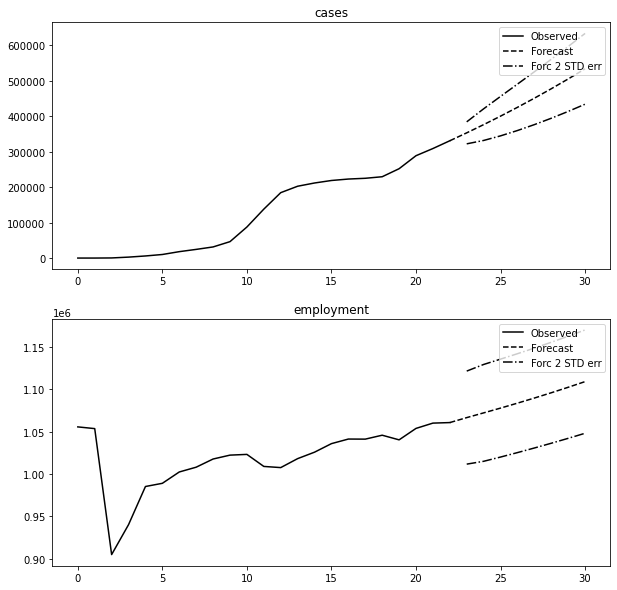

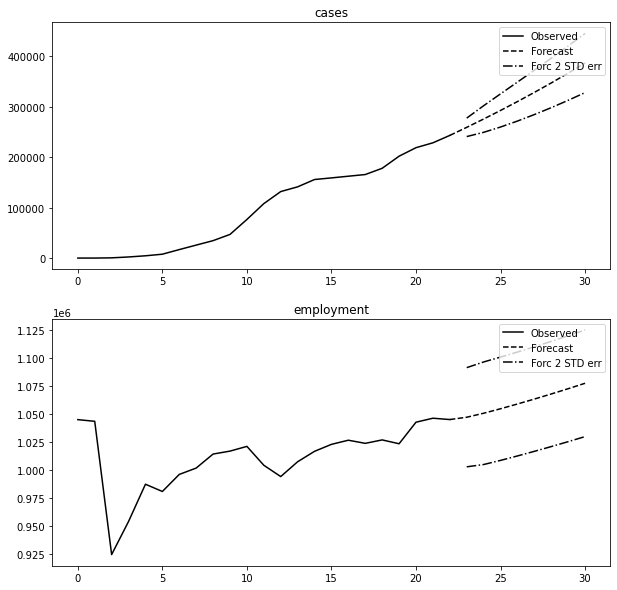

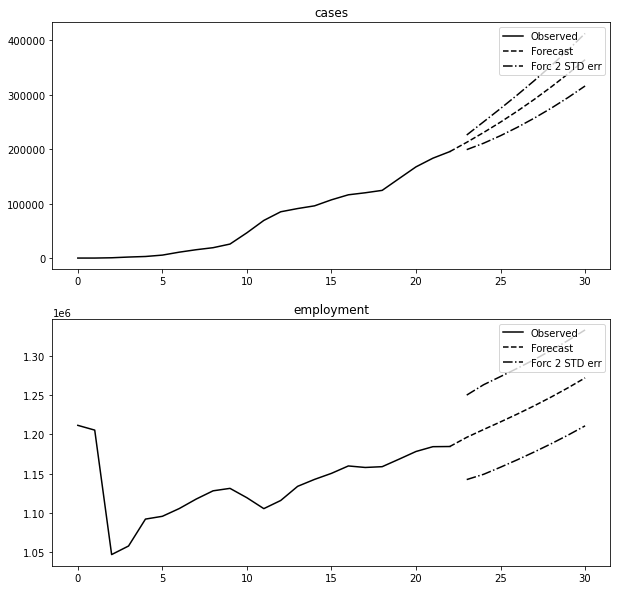

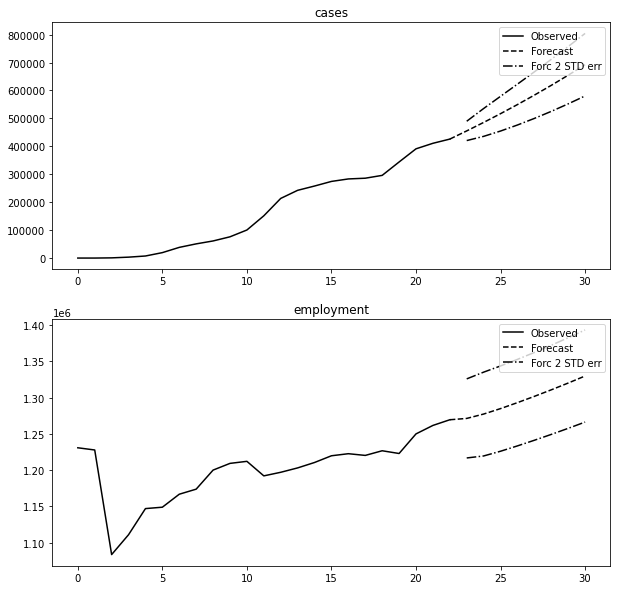

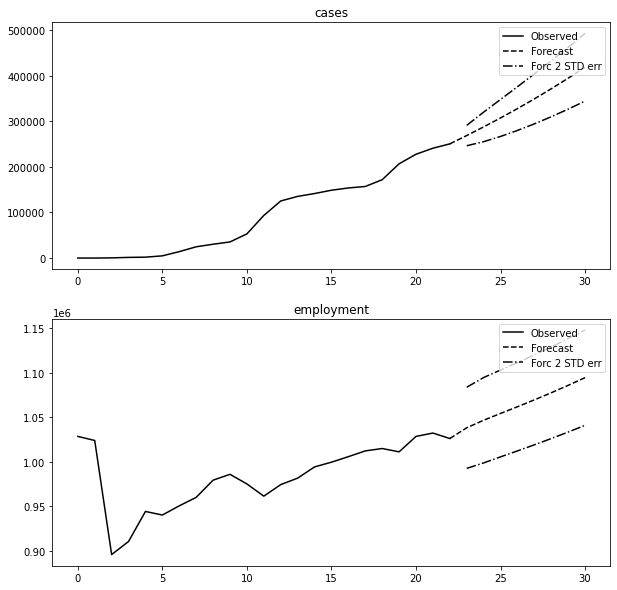

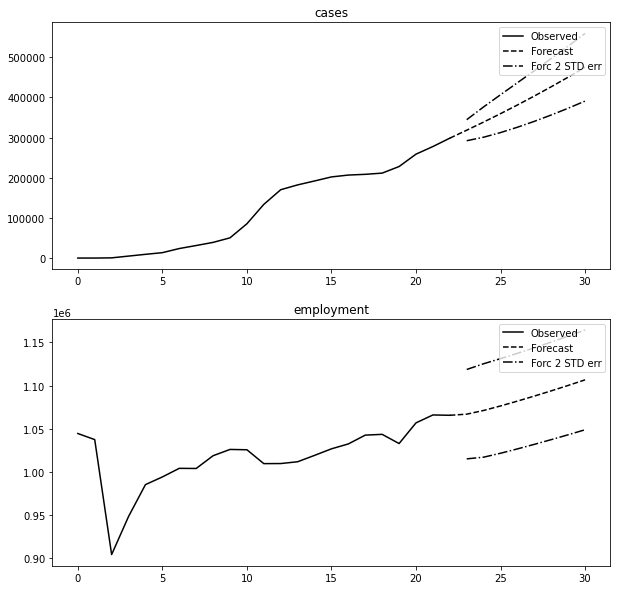

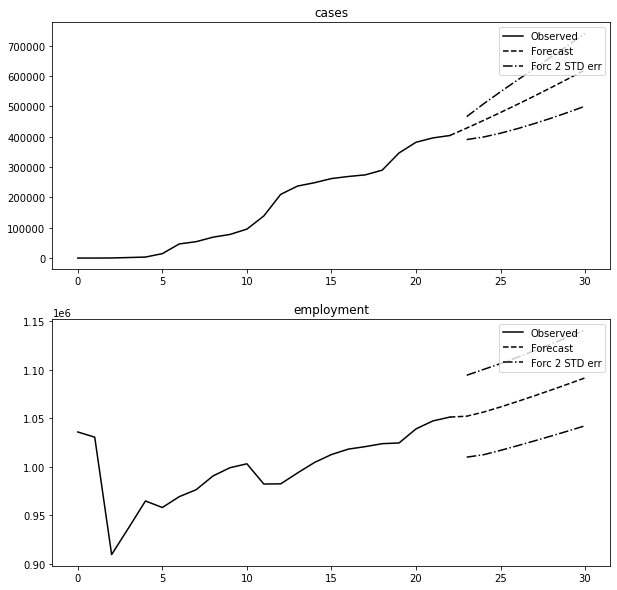

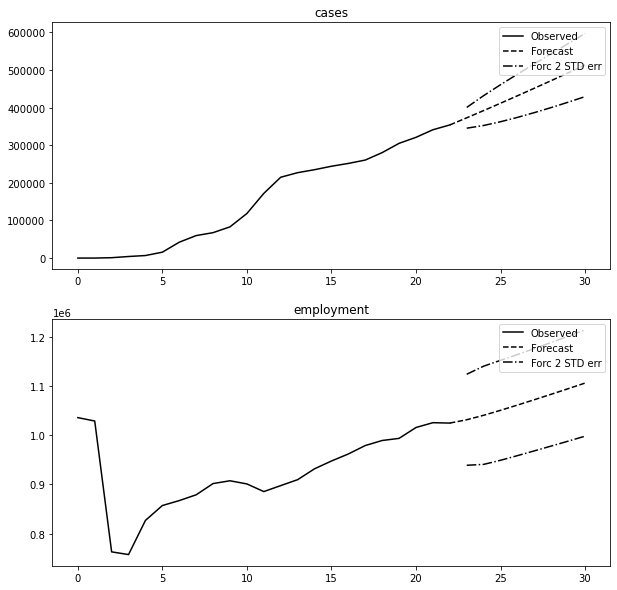

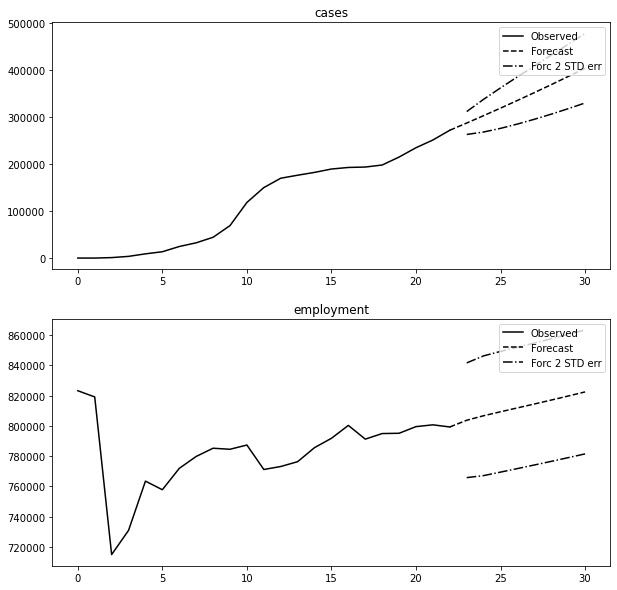

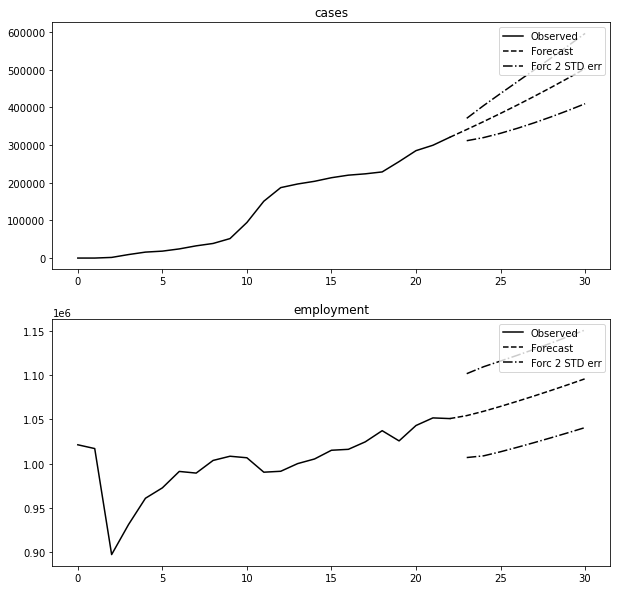

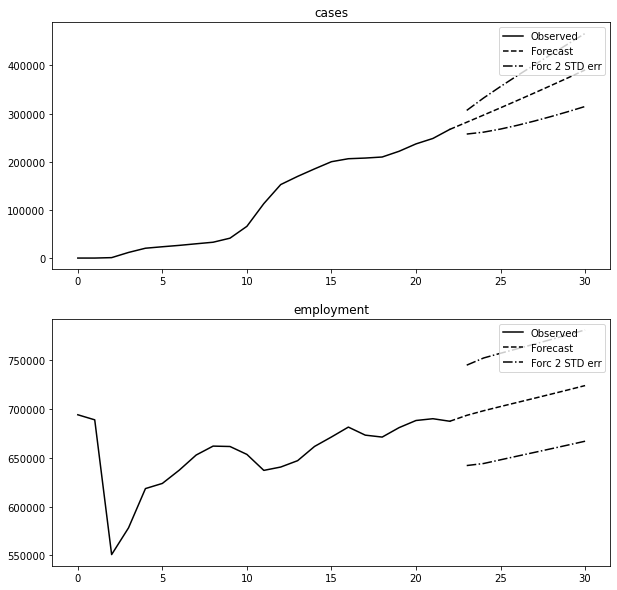

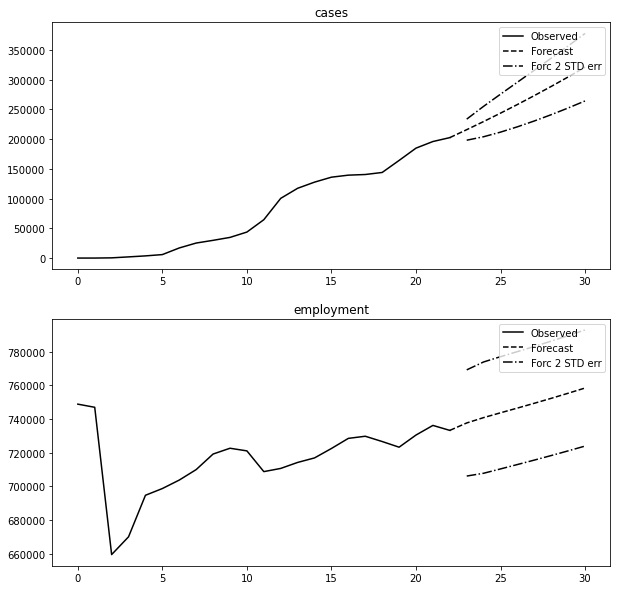

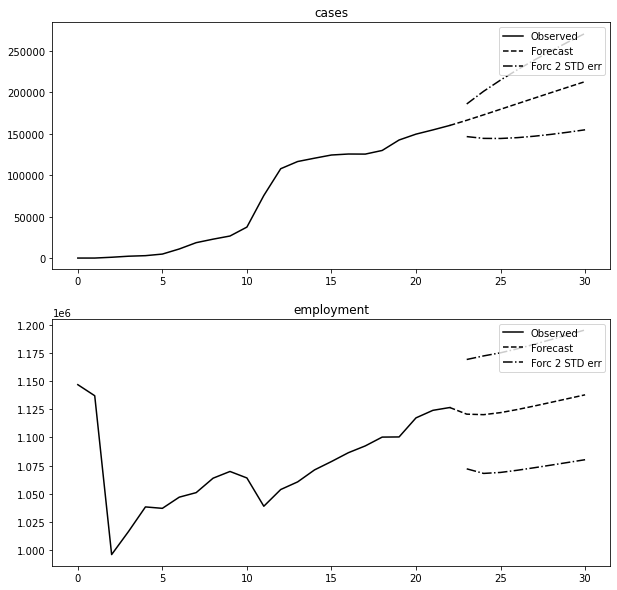

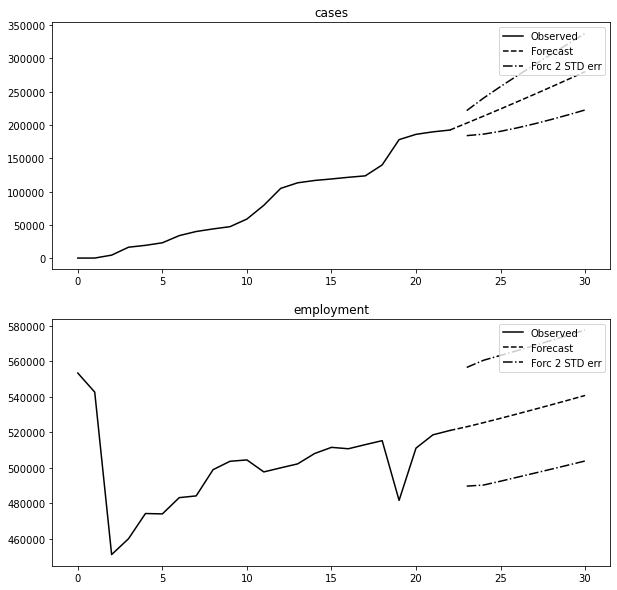

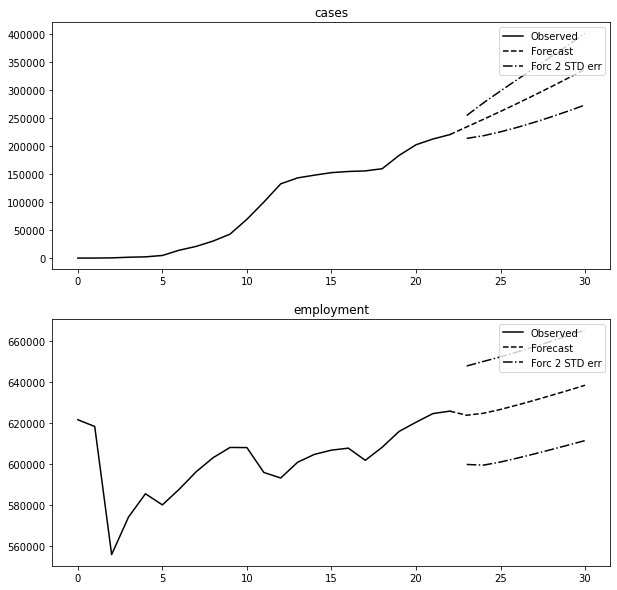

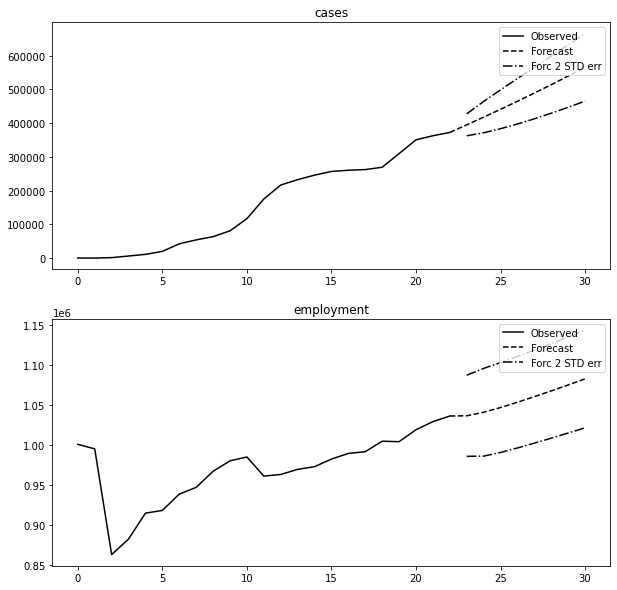

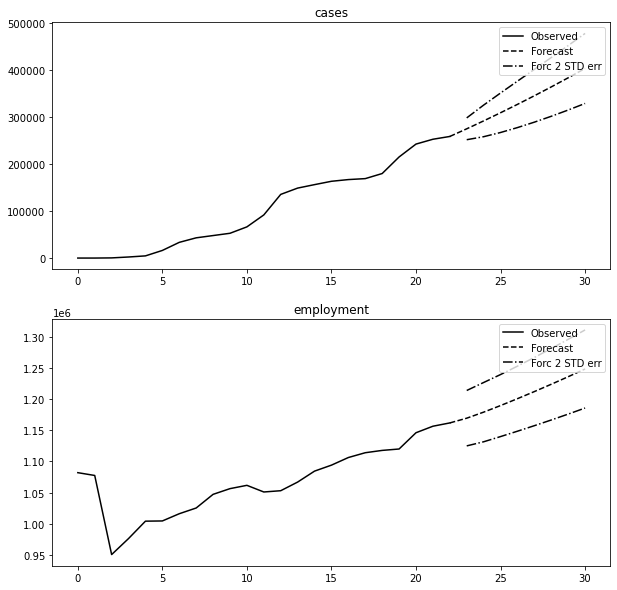

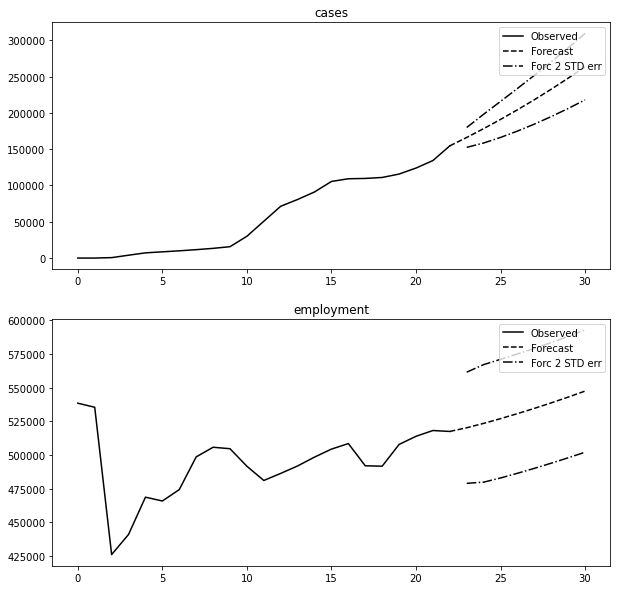

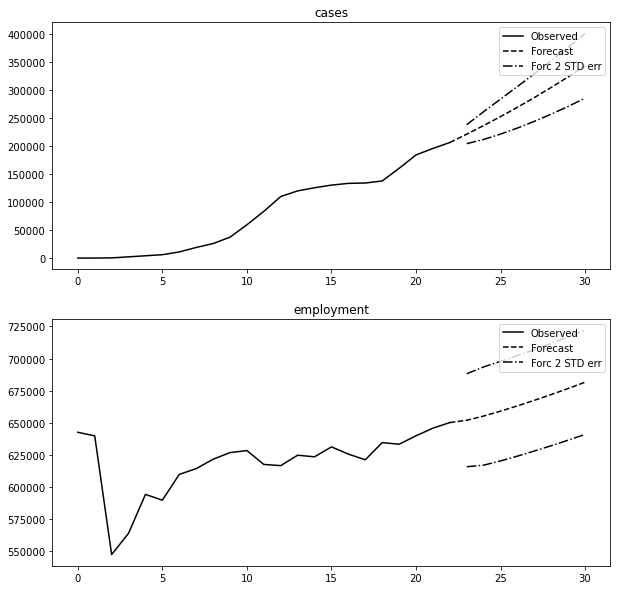

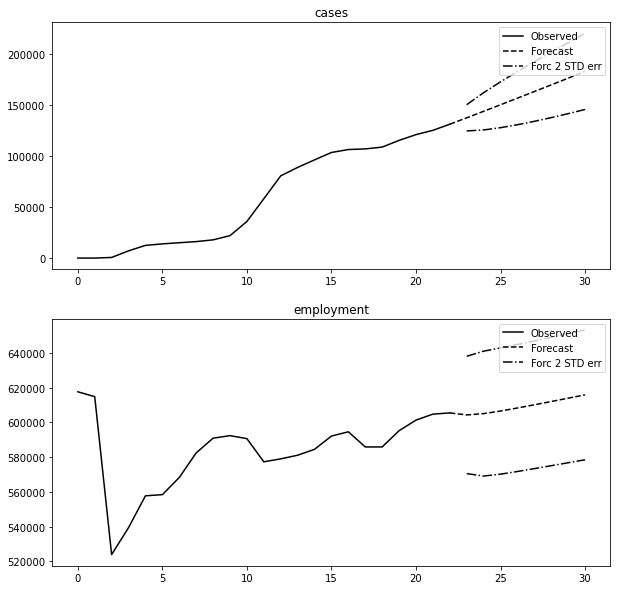

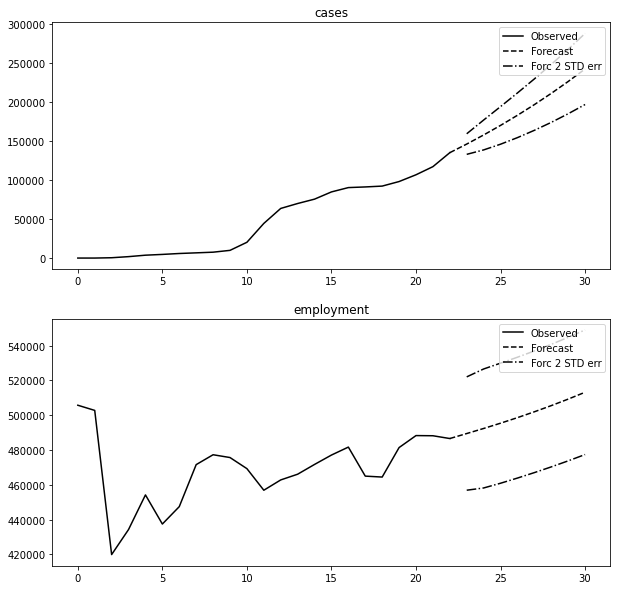

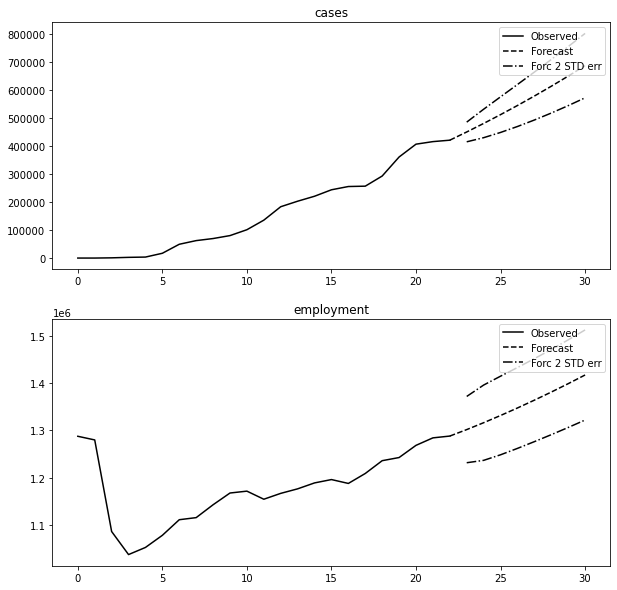

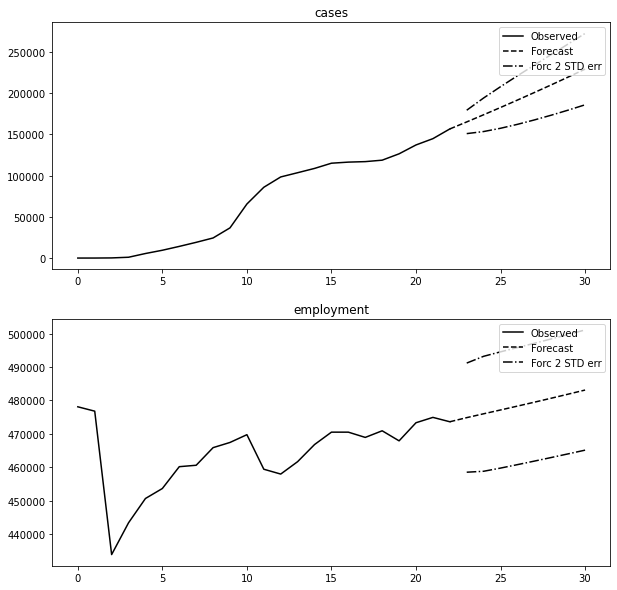

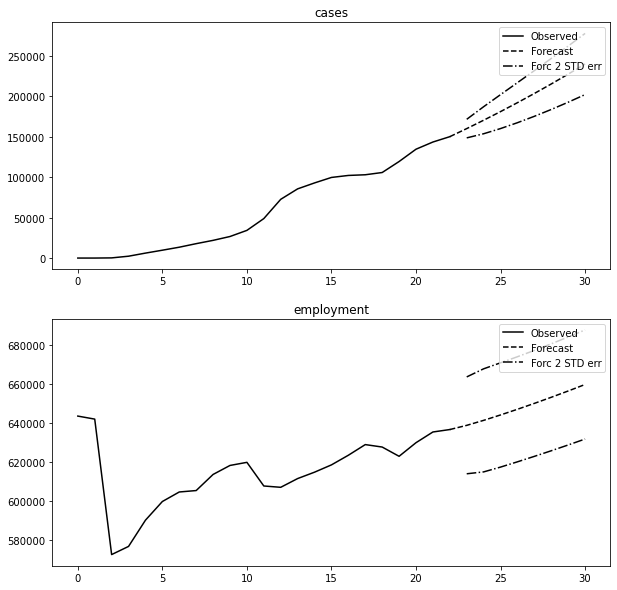

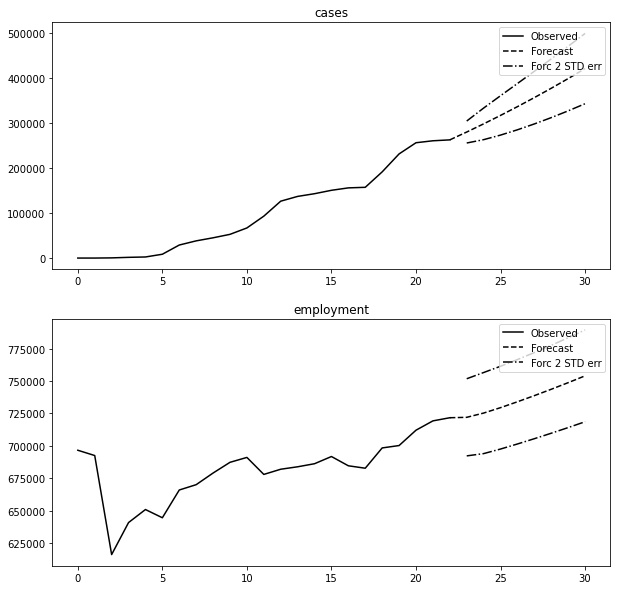

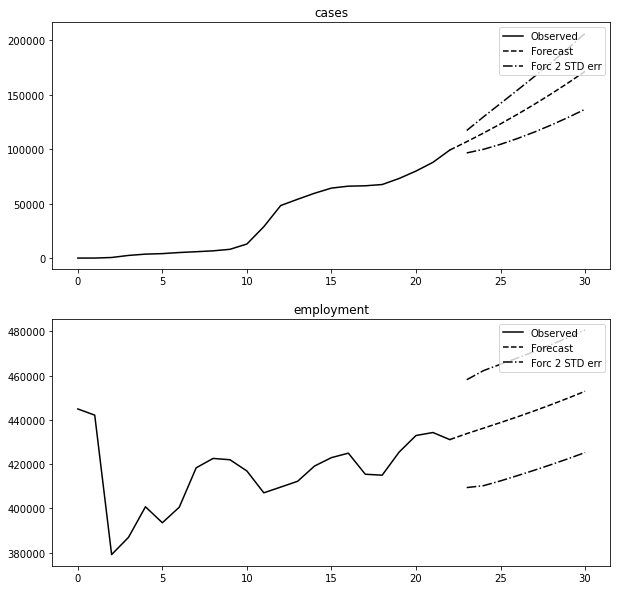

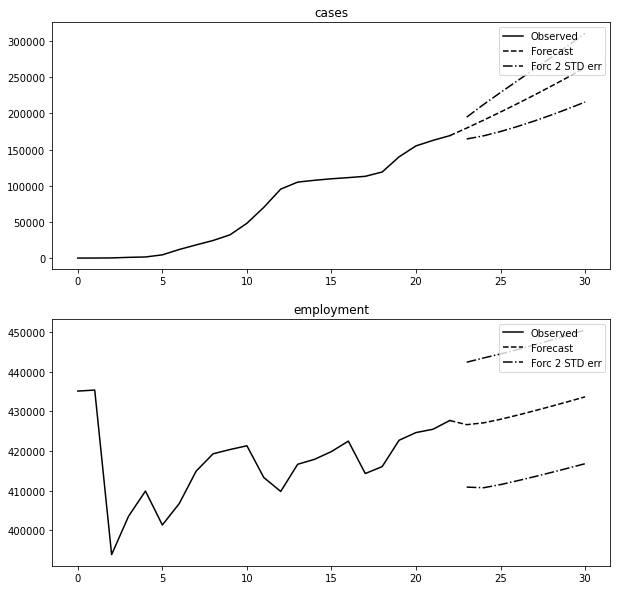

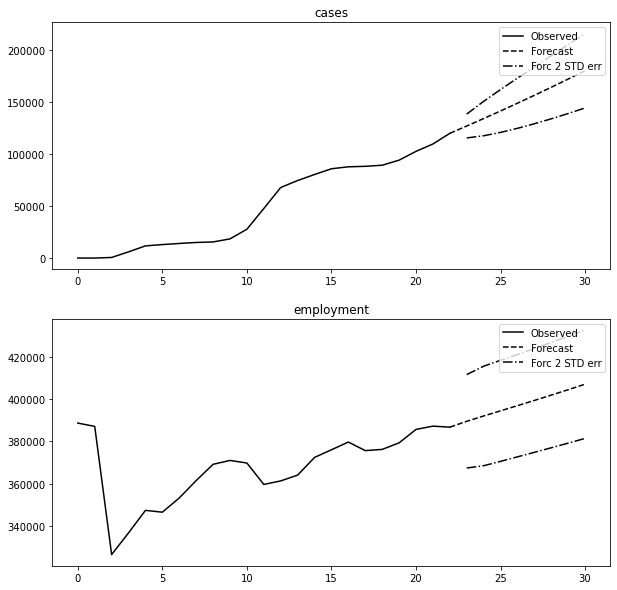

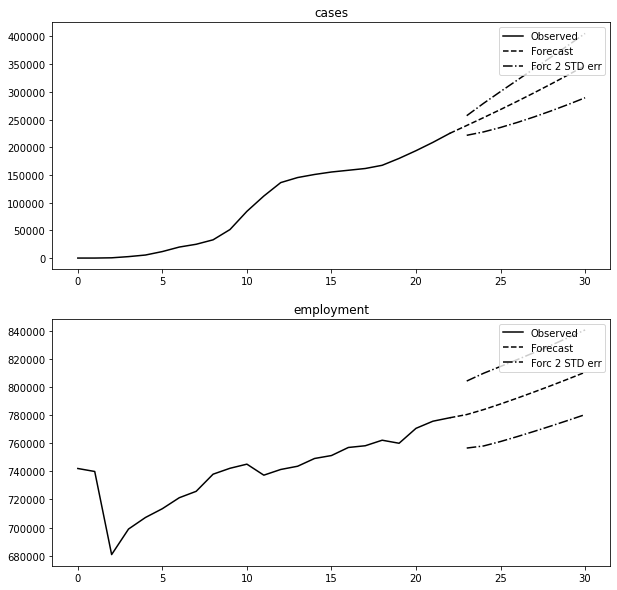

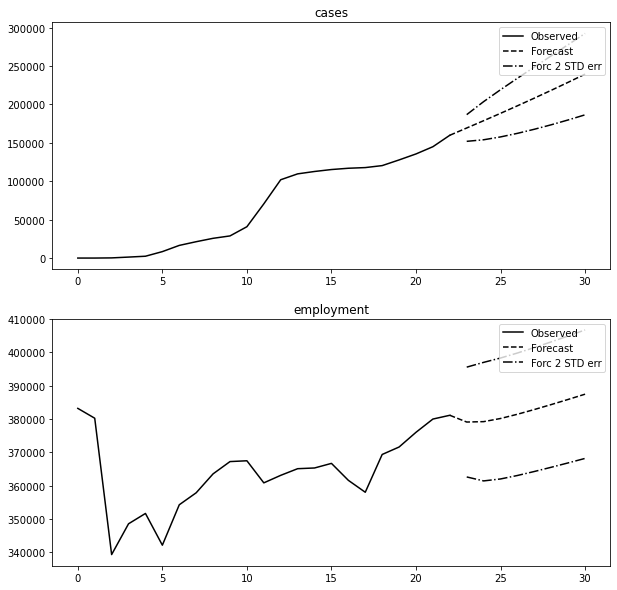

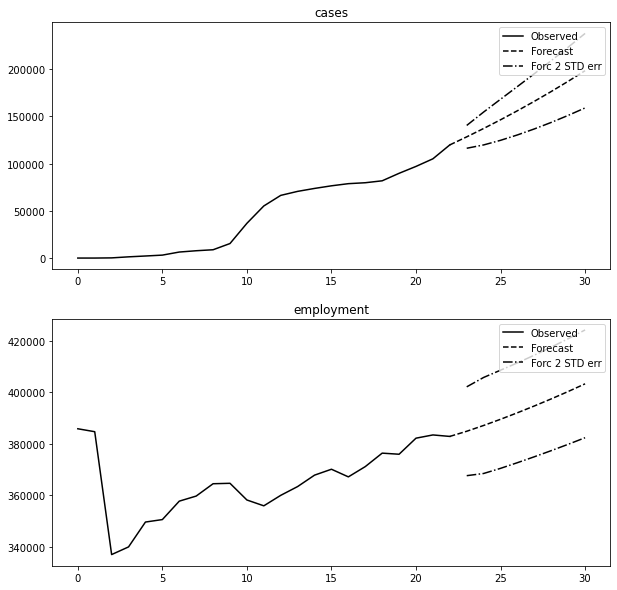

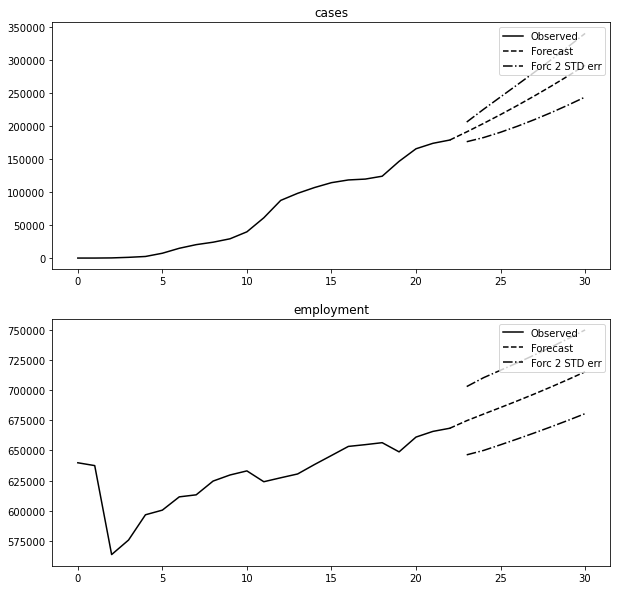

In [64]:
coefs = []

for code in code_lst:
    covid = cases[["Date", code]]
    employ = emp[["Date", code]]

    covid["Date"] = pd.to_datetime(covid["Date"])
    employ["Date"] = pd.to_datetime(employ["Date"])

    employ[code] = employ[code].replace("," "")
    employ[code] = employ[code].apply(dele)
    employ[code] = employ[code].astype(int)

    covid.columns = ["Date", "cases"]
    employ.columns = ["Date", "employment"]

    data = pd.merge(covid, employ)
    data = data.sort_values(by=["Date"])

    data.index = data["Date"]
    data = data[["cases", "employment"]]

    for name, column in data.iteritems():
        adfuller_test(column, column.name)

    model = VAR(data)

    results = model.fit(1)
    coefs.append(results.coefs[0][1][0])
    print(results.summary())
    
    model.select_order(6)
    results = model.fit(maxlags=1, ic='aic')
    lag_order = results.k_ar
    results.forecast(data.values[-lag_order:], 2)
    results.plot_forecast(8)

    
    

In [55]:
coeffs = pd.DataFrame()
coeffs["code"] = code_lst
coeffs["coefficients"] = coefs
coeffs.to_csv("coefs_MSA.csv")